What is the size of the dataset and what are the variables included?
What is the distribution of the target variable (survival) and how many passengers survived?
What is the distribution of the other variables (age, fare, class, etc.)?
Are there any missing values in the dataset and how can they be handled?
Is there any correlation between the variables?
How does the survival rate differ by gender?
How does the survival rate differ by age?
How does the survival rate differ by passenger class?
How does the survival rate differ by the port of embarkation?
Are there any outliers in the dataset and how can they be handled?

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns

In [201]:
df=pd.read_csv(r'C:\Users\TIWARI 210113\Downloads\Data science\Dataset\titanic\train.csv')

In [202]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [203]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [204]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [205]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [207]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [208]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [209]:
df.drop(['Cabin','PassengerId','Name','Ticket'], axis='columns', inplace=True)

In [210]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [211]:
df.shape

(891, 8)

In [212]:
df.dropna(inplace=True)

In [213]:
df.shape

(712, 8)

In [214]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [215]:
df.groupby("Age")["Survived"].count()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Survived, Length: 88, dtype: int64

In [216]:
survived_mask = df["Survived"] == 1
survived_passengers = df[survived_mask]

In [217]:
survived_by_age = survived_passengers.groupby("Age")["Survived"].count()


In [218]:
survived_by_age

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
58.00    3
60.00    2
62.00    1
63.00    2
80.00    1
Name: Survived, Length: 65, dtype: int64

In [219]:
df['Age'].min()

0.42

In [220]:
df[(df['Age']<=20) & (df['Survived']==1)].shape[0]

82

In [221]:
survived=df[(df['Survived']==1)]
survived_people=df.groupby(['Sex'])['Survived'].size()
survived_people

Sex
female    259
male      453
Name: Survived, dtype: int64

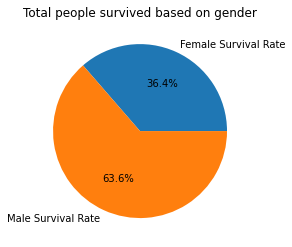

In [222]:
plt.pie(survived_people,autopct='%1.1f%%',labels=['Female Survival Rate','Male Survival Rate'])
plt.title('Total people survived based on gender')
plt.show()

In [223]:
gender_survival_counts

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

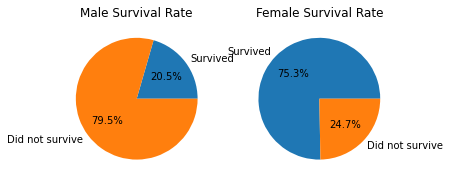

In [224]:
import pandas as pd
import matplotlib.pyplot as plt


# Group passengers by gender and survival status, and count number of passengers in each group
gender_survival_counts = df.groupby(['Sex', 'Survived']).size()
gender_survival_counts
# Extract counts for males and females
male_survival_counts = gender_survival_counts.loc[('male', 1)], gender_survival_counts.loc[('male', 0)]
female_survival_counts = gender_survival_counts.loc[('female', 1)], gender_survival_counts.loc[('female', 0)]

# Plot pie chart for males
plt.subplot(1, 2, 1)
plt.pie(male_survival_counts, labels=['Survived', 'Did not survive'], autopct='%1.1f%%')
plt.title('Male Survival Rate')

# Plot pie chart for females
plt.subplot(1, 2, 2)
plt.pie(female_survival_counts, labels=['Survived', 'Did not survive'], autopct='%1.1f%%')
plt.title('Female Survival Rate')

# Display the chart
plt.show()


In [225]:
sex_ratio

Sex
female    259
male      453
Name: Survived, dtype: int64

In [226]:
gender_survival_counts

Sex     Survived
female  0            64
        1           195
male    0           360
        1            93
dtype: int64

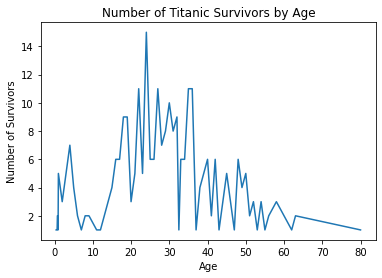

In [227]:
import matplotlib.pyplot as plt
survived_mask = df["Survived"] == 1
survived_passengers = df[survived_mask]
survived_by_age = survived_passengers.groupby("Age")["Survived"].count()
survived_by_age = survived_by_age.sort_index()

plt.plot(survived_by_age.index, survived_by_age.values)
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.title("Number of Titanic Survivors by Age")
plt.show()


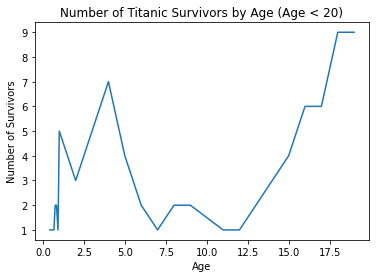

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S
22,1,3,female,15.0,0,0,8.0292,Q
39,1,3,female,14.0,1,0,11.2417,C
43,1,2,female,3.0,1,2,41.5792,C
...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S
855,1,3,female,18.0,0,1,9.3500,S
869,1,3,male,4.0,1,1,11.1333,S
875,1,3,female,15.0,0,0,7.2250,C


In [228]:
import matplotlib.pyplot as plt
survived_mask = df["Survived"] == 1
age_mask = df["Age"] < 20
young_survivors = df[survived_mask & age_mask]
survived_by_age = young_survivors.groupby("Age")["Survived"].count()
survived_by_age = survived_by_age.sort_index()
plt.plot(survived_by_age.index, survived_by_age.values)
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.title("Number of Titanic Survivors by Age (Age < 20)")
plt.show()

young_survivors

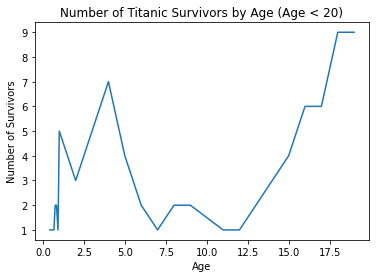

In [229]:
import matplotlib.pyplot as plt
survived_mask = df["Survived"] == 1
age_mask = df["Age"] < 20
young_survivors = df[survived_mask & age_mask]
survived_by_age = young_survivors.groupby("Age")["Survived"].count()
survived_by_age = survived_by_age.sort_index()
plt.plot(survived_by_age.index, survived_by_age.values)
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.title("Number of Titanic Survivors by Age (Age < 20)")
plt.show()


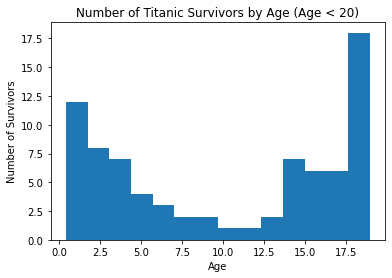

In [230]:
plt.hist(young_survivors["Age"], bins=14)
plt.xlabel("Age")
plt.ylabel("Number of Survivors")
plt.title("Number of Titanic Survivors by Age (Age < 20)")
plt.show()

In [231]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

In [232]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [254]:
df['Pclass'].value_counts()

3    355
1    184
2    173
Name: Pclass, dtype: int64

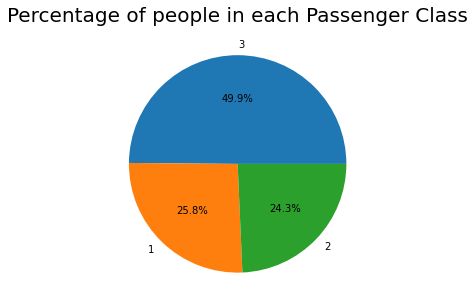

In [251]:
plt.figure(figsize=(10,5))
plt.pie(df['Pclass'].value_counts() ,labels=df['Pclass'].value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of people in each Passenger Class',size=20)
plt.show()

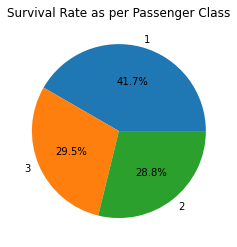

In [247]:
survived=df[df['Survived']==1]
plt.pie(survived['Pclass'].value_counts(),labels=survived['Pclass'].value_counts().index ,autopct='%1.1f%%')
plt.title('Survival Rate as per Passenger Class')
plt.show()

E:\BACKUP ON 13.01.21\DOCUMENT\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


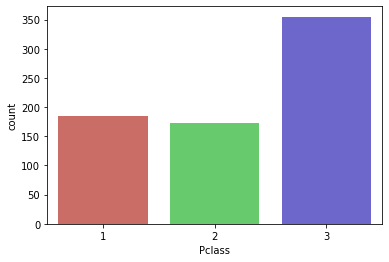

In [235]:
import seaborn as sns
sns.countplot(df['Pclass'],data=df,palette ='hls')
plt.show()

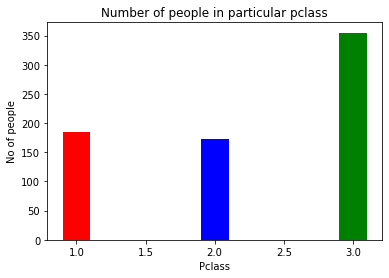

In [236]:
sort_pclass=df['Pclass'].value_counts().sort_index()
plt.bar(sort_pclass.index,color=['red','blue','green'],width=[0.2,0.2,0.2] ,height=sort_pclass.values)
plt.xlabel('Pclass')
plt.ylabel('No of people')
plt.title('Number of people in particular pclass')
plt.show()

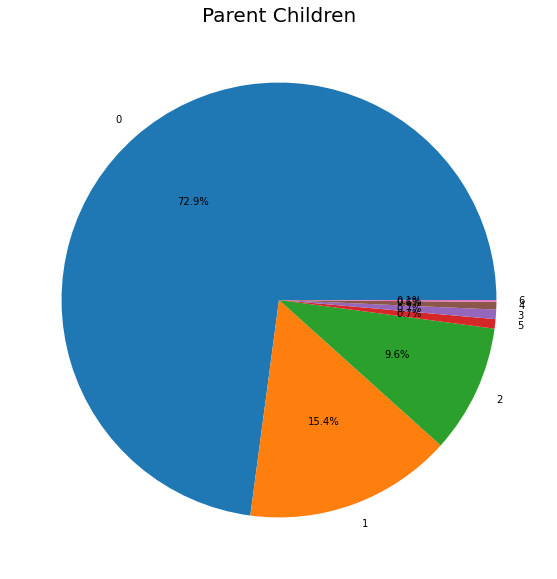

In [237]:
plt.figure(figsize=(20,10))
plt.pie(df['Parch'].value_counts(),labels=df['Parch'].value_counts().index,autopct='%1.1f%%')
plt.title('Parents Children',size=20)
plt.show()

<AxesSubplot:>

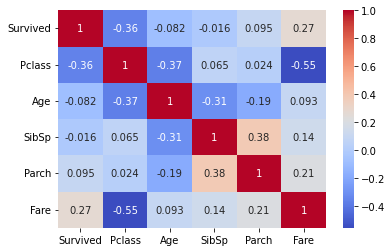

In [265]:
# Compute the correlation matrix
corr_matrix =df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')


# Parch and Sibsp -this two variables are highly correlated

In [276]:
# Calculate the summary statistics for each variable
summary_df = df.describe()

# Calculate the IQR for each variable
iqr_df = summary_df.loc['75%'] - summary_df.loc['25%']

# Calculate the lower and upper bounds for outliers
lower_bounds = summary_df.loc['25%'] - 1.5 * iqr_df
upper_bounds = summary_df.loc['75%'] + 1.5 * iqr_df

# Identify the outliers for each variable
outliers_df = (df < lower_bounds) | (df > upper_bounds)

# Print the number of outliers for each variable
print(outliers_df.sum())

Age          8
Embarked     0
Fare        95
Parch       15
Pclass       0
Sex          0
SibSp       35
Survived     0
dtype: int64


C:\Users\TIWARI~1\AppData\Local\Temp/ipykernel_9144/1275005200.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_df = (df < lower_bounds) | (df > upper_bounds)


# Age ,Fare,Parch,SibSp have outliers 

Finding outliers in each variable using boxplot

<AxesSubplot:xlabel='Age'>

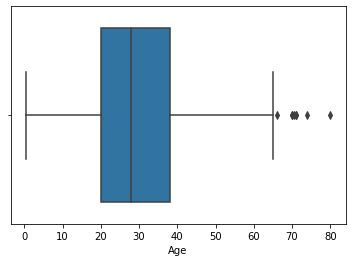

In [256]:
sns.boxplot(x=df['Age'])

<AxesSubplot:xlabel='Parch'>

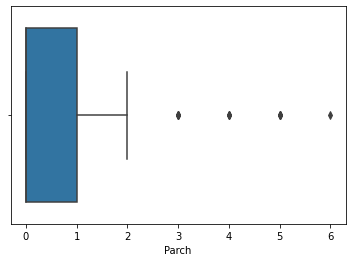

In [257]:
sns.boxplot(x=df['Parch'])

<AxesSubplot:xlabel='SibSp'>

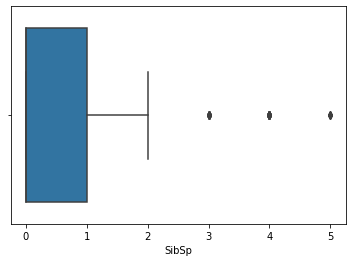

In [259]:
sns.boxplot(x=df['SibSp'])

<AxesSubplot:xlabel='Fare'>

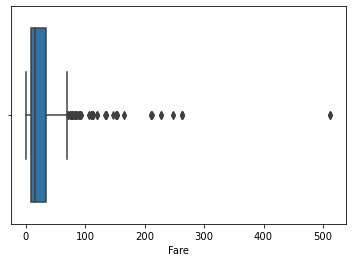

In [267]:
sns.boxplot(x=df['Fare'])